# Imports:

In [1]:
from collections import defaultdict
import sys, os, re, argparse, natsort
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pylab import savefig
from tqdm import tqdm
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from IPython.display import display, HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/hide the code."></form>''')

# Functions:

In [14]:
def read_annotation(file):
    columns = ["sample", "circ_tot", "exonic","single_end_annotated", 
               "tot_exonic", "monoexonic", "c", "lnc", "autres", "intronic", 
               "subexonic", "non_annotated", "antisens_exonic", 
               "ccr_tot", "ccr_exonic", "ccr_single_end_annotated", "ccr_intronic", 
               "ccr_infraexonic"]
    df = pd.read_table(file, sep = '\t', names=columns)
    return df

# I. Number of circRNAs for each category: 

In [3]:
df_stats_annot = read_annotation("../stats_annotation_all.tsv")
display(df_stats_annot)
# reindex or change the order of rows
#df_stats_annot = df_stats_annot.reindex([23,27,22,18,21,1,12,26,24,0,9,16,25,8,11,13,10,2,15,4,3,19,5,6,7,20,17,28,14])
df_stats_annot = df_stats_annot.reindex([12,26,24,0,9,16,25,8,11,13,10,2,23,27,22,18,21,1,20,17,28,14,15,4,3,19,5,6,7])
# Rearrange rows in ascending order pandas python
df_stats_annot["ccr_non_annotated"] = df_stats_annot["ccr_tot"] - (df_stats_annot["ccr_exonic"] +
                                                                      df_stats_annot["ccr_single_end_annotated"] +
                                                                      df_stats_annot["ccr_intronic"] +
                                                                      df_stats_annot["ccr_infraexonic"])
display(df_stats_annot)

,sample,circ_tot,exonic,single_end_annotated,tot_exonic,monoexonic,c,lnc,autres,intronic,infraexonic,non_annotated,antisens_exonic,ccr_tot,ccr_exonic,ccr_single_end_annotated,ccr_intronic,ccr_infraexonic
0,cow-liver-B022,2187,1228,175,1415,33,1227,1,0,5,286,493,0,35638,18430,2518,37,4573
1,cow-testis-neonat-3,5178,3413,462,3895,138,3407,6,0,23,89,1191,1,114401,62061,9083,289,1041
2,cow-liver-K024,2541,1353,202,1564,47,1351,2,0,8,462,516,1,41340,21164,2925,44,7702
3,pig-testis-Testis-31,17308,10443,1360,11822,251,10369,58,16,141,154,5210,0,387910,226386,24795,16164,4397
4,pig-testis-Testis-16,4707,3061,353,3420,80,3043,14,4,25,123,1145,0,66604,42596,4727,1749,1452
5,pig-testis-Testis-65,3380,2255,201,2461,71,2246,7,2,20,90,814,0,43803,28112,2673,1490,1225
6,pig-testis-Testis-73,4815,3247,320,3572,103,3229,16,2,21,95,1132,0,69084,45087,4280,1919,1999
7,pig-testis-Testis-91,4779,3163,340,3510,88,3141,17,5,27,119,1130,0,68014,43398,4665,2551,1649
8,cow-liver-K006,1804,910,139,1055,34,910,0,0,2,371,382,0,28320,12590,1764,19,6037
9,cow-liver-B027,2794,1464,218,1695,42,1461,3,0,4,561,547,0,47836,22024,2903,27,13338


,sample,circ_tot,exonic,single_end_annotated,tot_exonic,monoexonic,c,lnc,autres,intronic,infraexonic,non_annotated,antisens_exonic,ccr_tot,ccr_exonic,ccr_single_end_annotated,ccr_intronic,ccr_infraexonic,ccr_non_annotated
12,cow-liver-B004,1978,1083,164,1253,27,1083,0,0,4,335,392,0,31017,15727,2268,24,5416,7582
26,cow-liver-B005,1892,997,141,1144,28,996,1,0,7,321,426,0,31446,13618,2130,48,6252,9398
24,cow-liver-B008,2185,1097,159,1264,41,1097,0,0,4,418,507,0,36846,15469,2020,28,8674,10655
0,cow-liver-B022,2187,1228,175,1415,33,1227,1,0,5,286,493,0,35638,18430,2518,37,4573,10080
9,cow-liver-B027,2794,1464,218,1695,42,1461,3,0,4,561,547,0,47836,22024,2903,27,13338,9544
16,cow-liver-B028,2877,1437,212,1661,38,1434,3,0,5,535,688,0,54975,22093,3176,28,14316,15362
25,cow-liver-K001,2052,984,156,1149,30,983,1,0,2,531,379,0,33829,13668,1961,11,11594,6595
8,cow-liver-K006,1804,910,139,1055,34,910,0,0,2,371,382,0,28320,12590,1764,19,6037,7910
11,cow-liver-K011,2214,1168,165,1340,33,1167,1,0,4,446,431,0,37564,16717,2142,23,10821,7861
13,cow-liver-K013,2233,1200,181,1388,36,1199,1,0,3,409,440,0,36473,17427,2643,17,6654,9732


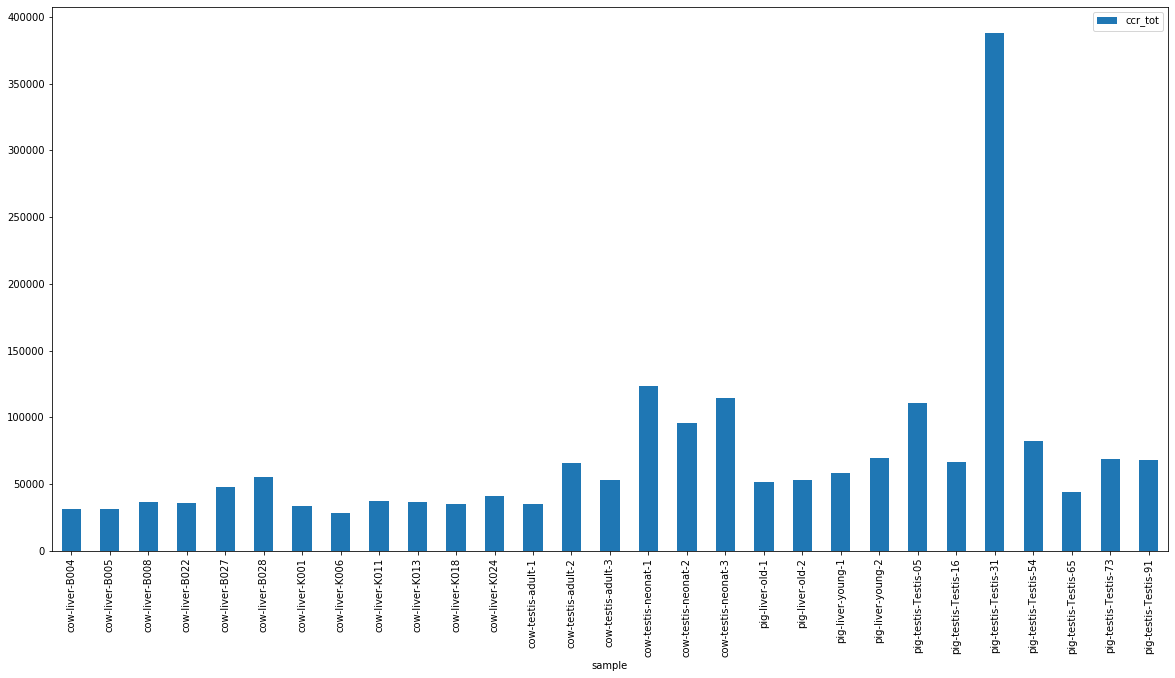

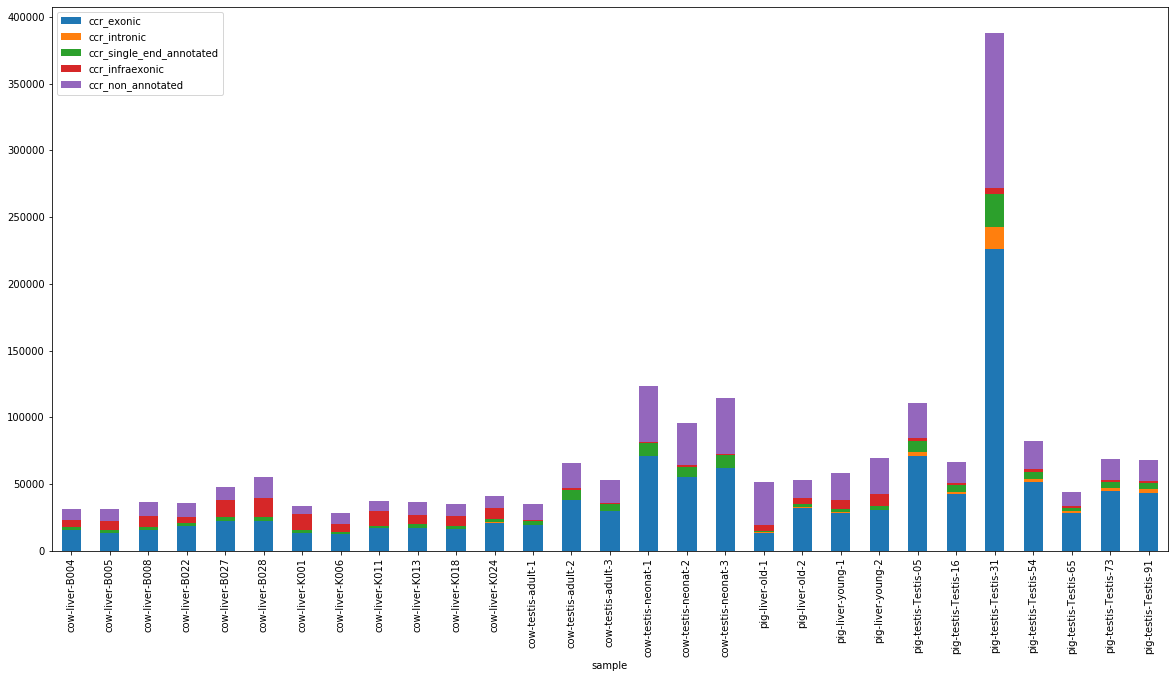

In [4]:
# Stacked bar plot: Number of CCR:
columns_nb_ccr = ["sample", "ccr_tot"]

df_nb_ccr = pd.DataFrame(df_stats_annot, columns=columns_nb_ccr)
nb_ccr_tot = df_nb_ccr.plot.bar(x='sample', stacked=True, figsize=(20,10))
figure_nb_ccr_tot = nb_ccr_tot.get_figure()    
figure_nb_ccr_tot.savefig("figures/nb_ccr_tot.png");

# Stacked bar plot: Number of CCR:
columns_nb_ccr = ["sample", "ccr_exonic", "ccr_intronic", "ccr_single_end_annotated", 
                  "ccr_infraexonic", "ccr_non_annotated"]
df_nb_ccr_type = pd.DataFrame(df_stats_annot, columns=columns_nb_ccr)



nb_ccr_type = df_nb_ccr_type.plot.bar(x='sample', stacked=True, figsize=(20,10))
figure_nb_ccr_type = nb_ccr_type.get_figure()    
figure_nb_ccr_type.savefig("figures/nb_ccr_type.png");

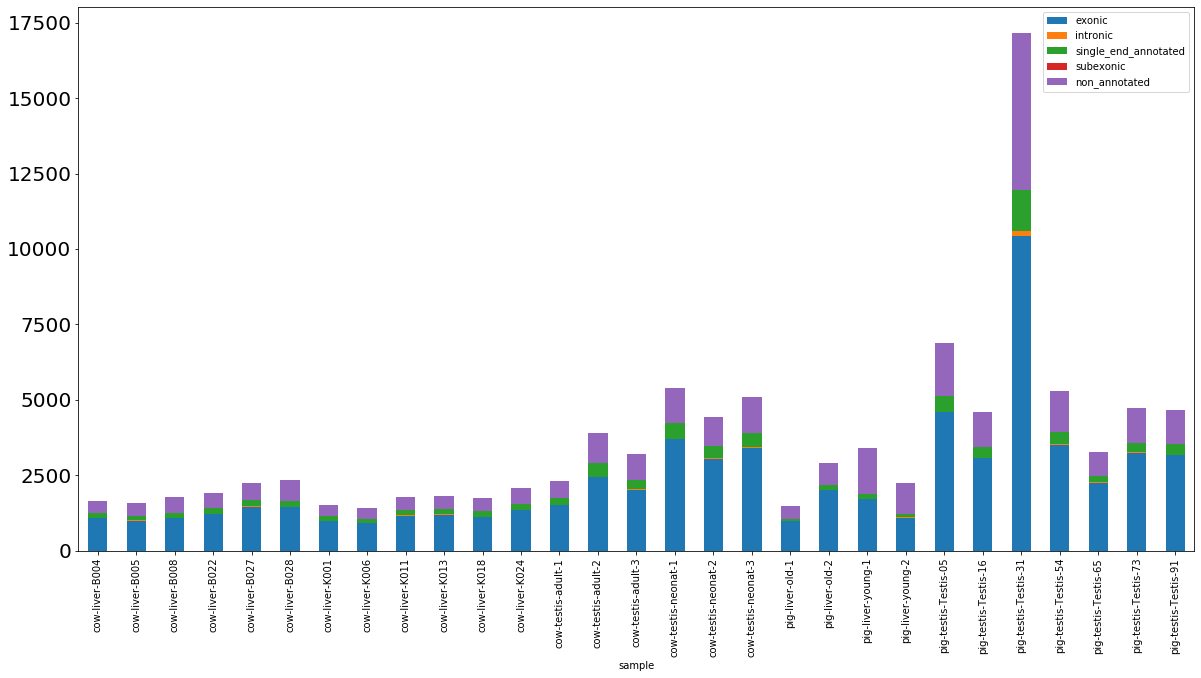

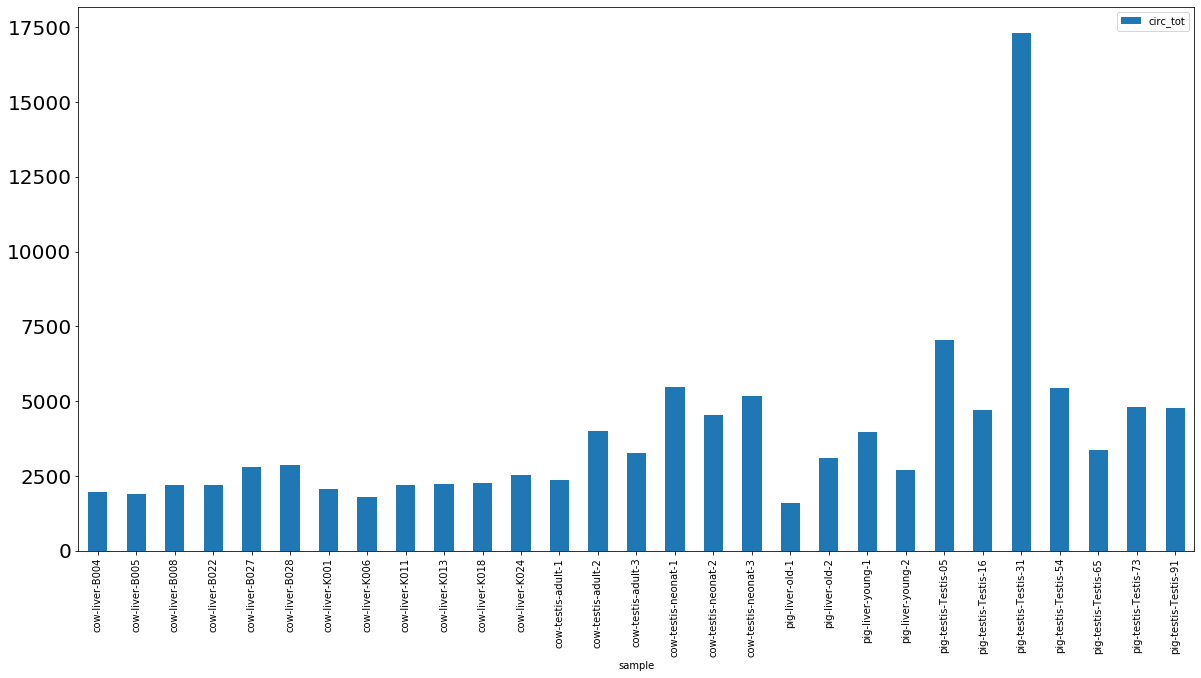

In [15]:
# Stacked bar plot:
columns_df1 = ["sample", "exonic", "intronic", "single_end_annotated",
               "subexonic", "non_annotated"]

df1 = pd.DataFrame(df_stats_annot, columns=columns_df1)
nb_circ_type = df1.plot.bar(x='sample', stacked=True, figsize=(20,10))
nb_circ_type.tick_params(axis='y', labelsize=20)
figure_nb_circ_type = nb_circ_type.get_figure()    
figure_nb_circ_type.savefig("figures/nb_circ_type.pdf");

columns_tot = ["sample", "circ_tot"]

df2 = pd.DataFrame(df_stats_annot, columns=columns_tot)
nb_circ_tot = df2.plot.bar(x='sample', stacked=True, figsize=(20,10))
nb_circ_tot.tick_params(axis='y', labelsize=20)
figure_nb_circ_tot = nb_circ_tot.get_figure()    
figure_nb_circ_tot.savefig("figures/nb_circ_tot.pdf");

In [6]:
# nb_circRNAs / nb_reads:
display(df2)

,sample,circ_tot
12,cow-liver-B004,1978
26,cow-liver-B005,1892
24,cow-liver-B008,2185
0,cow-liver-B022,2187
9,cow-liver-B027,2794
16,cow-liver-B028,2877
25,cow-liver-K001,2052
8,cow-liver-K006,1804
11,cow-liver-K011,2214
13,cow-liver-K013,2233


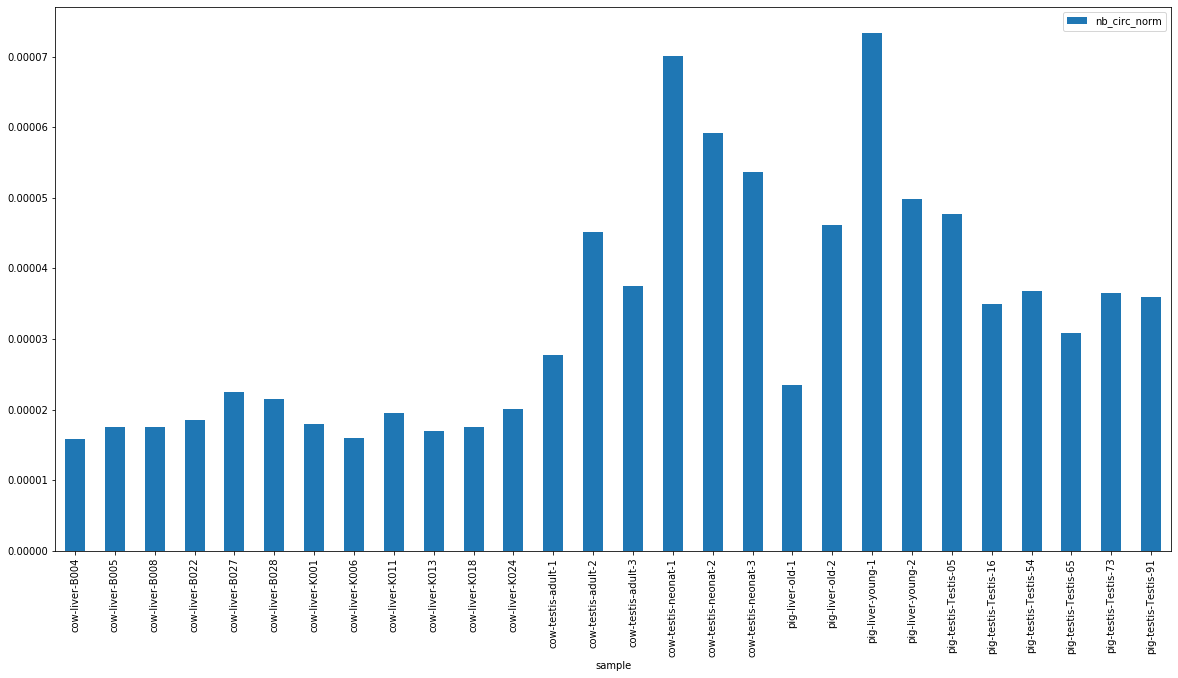

In [7]:
df_reads = pd.read_table("../mapping_stat.tsv")
columns = df_reads.columns.to_list()
df_reads = df_reads.drop(labels=['Started job on', 'Started mapping on', 'Finished on', 
                     'Mapping speed, Million of reads per hour',
                     'Average input read length',
                     'Deletion rate per base', 'Insertion rate per base',
                     'Deletion average length', 'Insertion average length',
                     'Mismatch rate per base, %'], axis=1)
unmap = (df_reads['% of reads unmapped: too many mismatches'] + df_reads['% of reads unmapped: too short'] +
         df_reads['% of reads unmapped: other']).mean()

aggregation_functions = defaultdict()
for column in df_reads.columns:
    if column == "sample":
        aggregation_functions[column] = 'first'
        continue
    if column == "read":
        aggregation_functions[column] = 'first'
        continue
    if "%" in column or 'Average' in column:
        aggregation_functions[column] = 'mean'
        continue
    if "number" in column.lower():
        aggregation_functions[column] = 'sum'
df_new_reads = df_reads.groupby(['sample','read']).aggregate(aggregation_functions)

# Create new column with the concatenation of sample and read names:
sample = df_new_reads["sample"].to_list() 
read = df_new_reads["read"].to_list()
sample_read = [i + "-" + j for i, j in zip(sample, read)] 
df_new_reads["sample-read"] = sample_read

columns_reads = ["sample", "Uniquely mapped reads number"]
df_reads2 = pd.DataFrame(df_new_reads, columns=columns_reads)

#df_final = df_reads2.stack().reset_index().groupby(['sample']).sum(axis=0)
df_read_final = df_reads2.groupby(level=0, axis=0).sum()
df_read_final = df_read_final[df_read_final.index != 'pig-testis-Testis-31']

df3 = df2.set_index('sample')
df_read_final["circ_tot"] = df3["circ_tot"]
df_read_final["nb_circ_norm"] = df_read_final["circ_tot"] / df_read_final["Uniquely mapped reads number"]
df_read_final["sample"] = df_read_final.index

# Plot the nb_circ_norm:
columns_norm = ["sample", "nb_circ_norm"]

df4 = pd.DataFrame(df_read_final, columns=columns_norm)
nb_circ_tot_norm = df4.plot.bar(x='sample', stacked=True, figsize=(20,10))
figure_nb_circ_norm = nb_circ_tot_norm.get_figure()    
figure_nb_circ_norm.savefig("figures/nb_circ_tot_norm.png");

[['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'green', 'green', 'green', 'limegreen', 'limegreen', 'limegreen']]


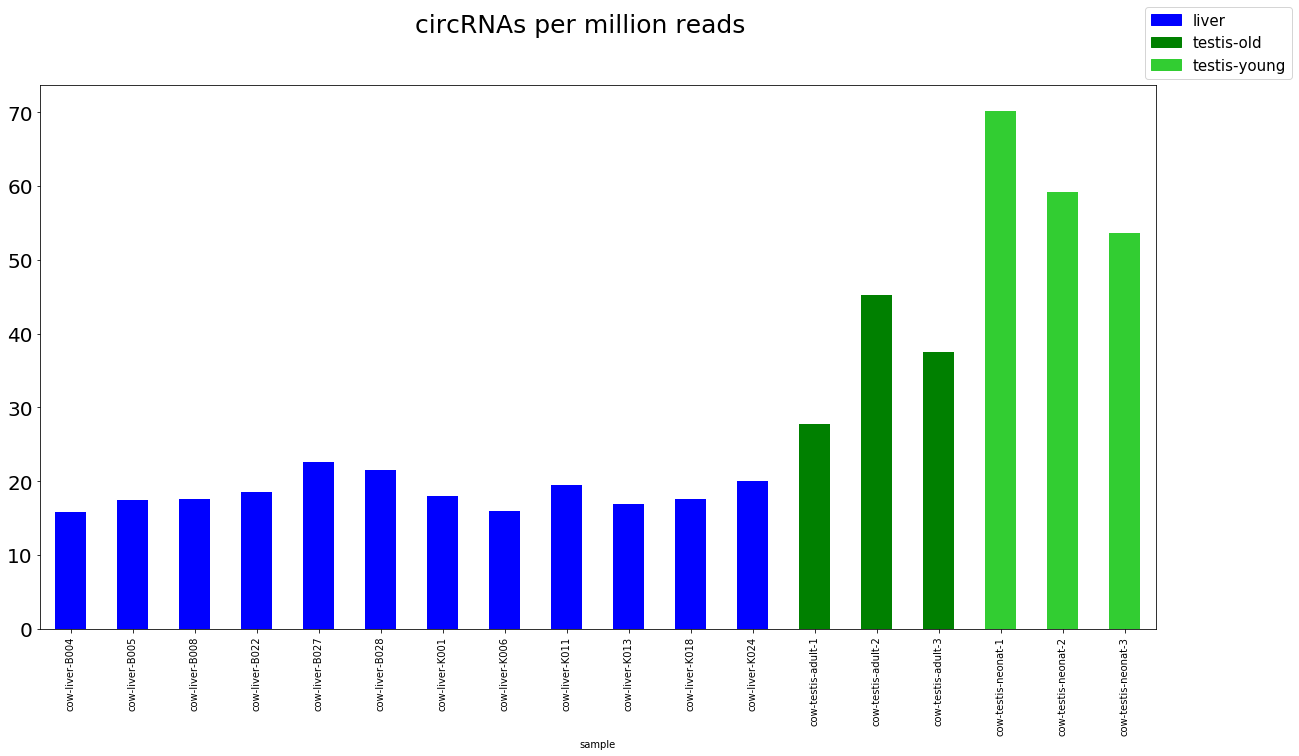

In [8]:
import matplotlib.patches as mpatches

df_reads = pd.read_table("../mapping_stat.tsv")
columns = df_reads.columns.to_list()
df_reads = df_reads.drop(labels=['Started job on', 'Started mapping on', 'Finished on', 
                     'Mapping speed, Million of reads per hour',
                     'Average input read length',
                     'Deletion rate per base', 'Insertion rate per base',
                     'Deletion average length', 'Insertion average length',
                     'Mismatch rate per base, %'], axis=1)
unmap = (df_reads['% of reads unmapped: too many mismatches'] + df_reads['% of reads unmapped: too short'] +
         df_reads['% of reads unmapped: other']).mean()

aggregation_functions = defaultdict()
for column in df_reads.columns:
    if column == "sample":
        aggregation_functions[column] = 'first'
        continue
    if column == "read":
        aggregation_functions[column] = 'first'
        continue
    if "%" in column or 'Average' in column:
        aggregation_functions[column] = 'mean'
        continue
    if "number" in column.lower():
        aggregation_functions[column] = 'sum'
df_new_reads = df_reads.groupby(['sample','read']).aggregate(aggregation_functions)

from itertools import cycle, islice

# Create new column with the concatenation of sample and read names:
sample = df_new_reads["sample"].to_list() 
read = df_new_reads["read"].to_list()
sample_read = [i + "-" + j for i, j in zip(sample, read)] 
df_new_reads["sample-read"] = sample_read

columns_reads = ["sample", "Uniquely mapped reads number"]
df_reads2 = pd.DataFrame(df_new_reads, columns=columns_reads)

#df_final = df_reads2.stack().reset_index().groupby(['sample']).sum(axis=0)
df_read_final = df_reads2.groupby(level=0, axis=0).sum()
df_read_final=df_read_final[~df_read_final.index.str.contains("pig")]
#df_read_final = df_read_final[~df_read_final.index.str.contains("cow")]

df3 = df2.set_index('sample')
df_read_final["circ_tot"] = df3["circ_tot"]
df_read_final["nb_circ_norm"] = df_read_final["circ_tot"] / df_read_final["Uniquely mapped reads number"]
df_read_final["sample"] = df_read_final.index
#df_read_final = df_read_final[df_read_final.index != 'pig-testis-Testis-31']

# Plot the nb_circ_norm:
columns_norm = ["sample", "nb_circ_norm"]

df4 = pd.DataFrame(df_read_final, columns=columns_norm)
df4["nb_circ_norm"] = df4["nb_circ_norm"]*1000000
#nb_circ_tot_norm = df4.plot.bar(x='sample', stacked=True, figsize=(20,10), legend=False, title="circRNAs per million reads", fontsize = 10)
#color_list = ['bbbbbbbbbbbbcccccc']
#color_list = ["royalblue2"*12, "limegreen"*3, "green"*3]
#color_list =  np.array(['b'*12 +'r'*6])
color_list =  [['b']*12 + ['green']*3 + ['limegreen']*3]

print(color_list)
#color_list = ['bbbbcccccc']
nb_circ_tot_norm = df4.plot.bar(x='sample', stacked=True, figsize=(20,10), legend=False, color=color_list)
nb_circ_tot_norm.tick_params(axis='y', labelsize=20)
figure_nb_circ_norm = nb_circ_tot_norm.get_figure()
figure_nb_circ_norm.suptitle('circRNAs per million reads', fontsize=25)
legend_b = mpatches.Patch(color='b', label='liver')
legend_c = mpatches.Patch(color='green', label='testis-old')
legend_d = mpatches.Patch(color='limegreen', label='testis-young')
figure_nb_circ_norm.legend(handles=[legend_b, legend_c, legend_d], fontsize=15)
figure_nb_circ_norm.savefig("figures/nb_circ_tot_norm.pdf");

,circ_tot
sample,
cow-liver-B004,1978
cow-liver-B005,1892
cow-liver-B008,2185
cow-liver-B022,2187
cow-liver-B027,2794
cow-liver-B028,2877
cow-liver-K001,2052
cow-liver-K006,1804
cow-liver-K011,2214


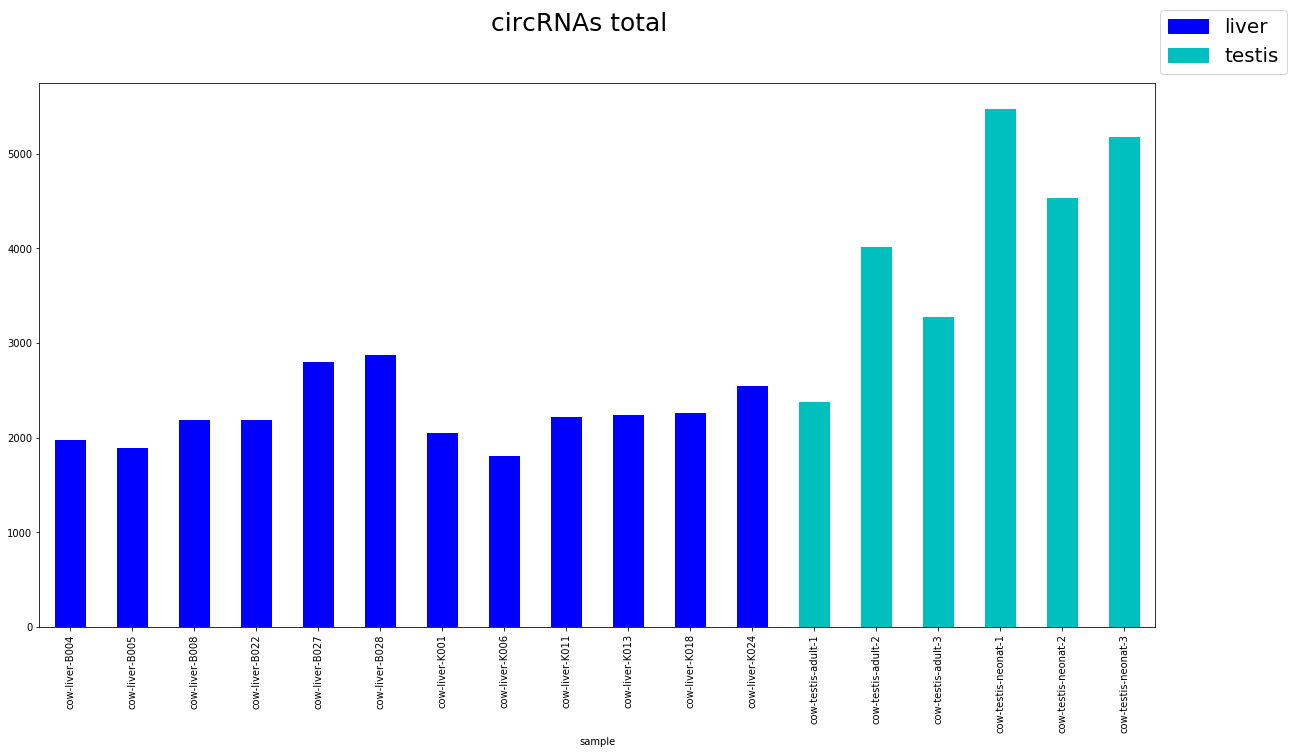

In [9]:
display(df3)
df3["sample"] = df3.index
df5 = df3[~df3.index.str.contains("pig")]
color_list = ['bbbbbbbbbbbbcccccc']
nb_circ_tot = df5.plot.bar(x='sample', stacked=True, figsize=(20,10), legend=False, color=color_list)
figure_nb_circ = nb_circ_tot.get_figure()
figure_nb_circ.suptitle('circRNAs total', fontsize=25)
legend_b = mpatches.Patch(color='b', label='liver')
legend_c = mpatches.Patch(color='c', label='testis')
figure_nb_circ.legend(handles=[legend_b, legend_c], fontsize=20)
figure_nb_circ.savefig("figures/nb_circ_tot_no_norm.png");

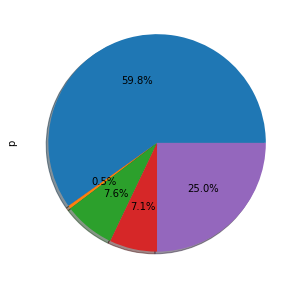

In [10]:
# PIE:

df1["tot"] = (df1["exonic"] + df1["intronic"] + df1["single_end_annotated"] + 
              df1["infraexonic"] + df1["non_annotated"])

nb_tot_moy = df1["tot"].mean()
nb_exonic_moy = df1["exonic"].mean()
nb_intronic_moy = df1["intronic"].mean()
nb_single_end_annotated_moy = df1["single_end_annotated"].mean()
nb_infraexonic_moy = df1["infraexonic"].mean()
nb_non_annotated_moy = df1["non_annotated"].mean()

p_exonic_moy = (nb_exonic_moy*100)/nb_tot_moy
p_intronic_moy = (nb_intronic_moy*100)/nb_tot_moy
p_single_end_annotated_moy = (nb_single_end_annotated_moy*100)/nb_tot_moy
p_infraexonic_moy = (nb_infraexonic_moy*100)/nb_tot_moy
p_non_annotated_moy = (nb_non_annotated_moy*100)/nb_tot_moy

df2 = pd.DataFrame({'p' : [p_exonic_moy, p_intronic_moy, p_single_end_annotated_moy, 
                            p_infraexonic_moy, p_non_annotated_moy]},
                    index=['exonic', 'intronic', 'single_end_annotated', 
                           'infraexonic', 'non_annotated'])

plot = df2.plot.pie(y='p', figsize=(5, 5), autopct='%1.1f%%', shadow=True, labels=None, legend=None)
figure_pie = plot.get_figure()
figure_pie.savefig("figures/nb_circ_tot_pie.pdf");

# II. Biotypes distribution:

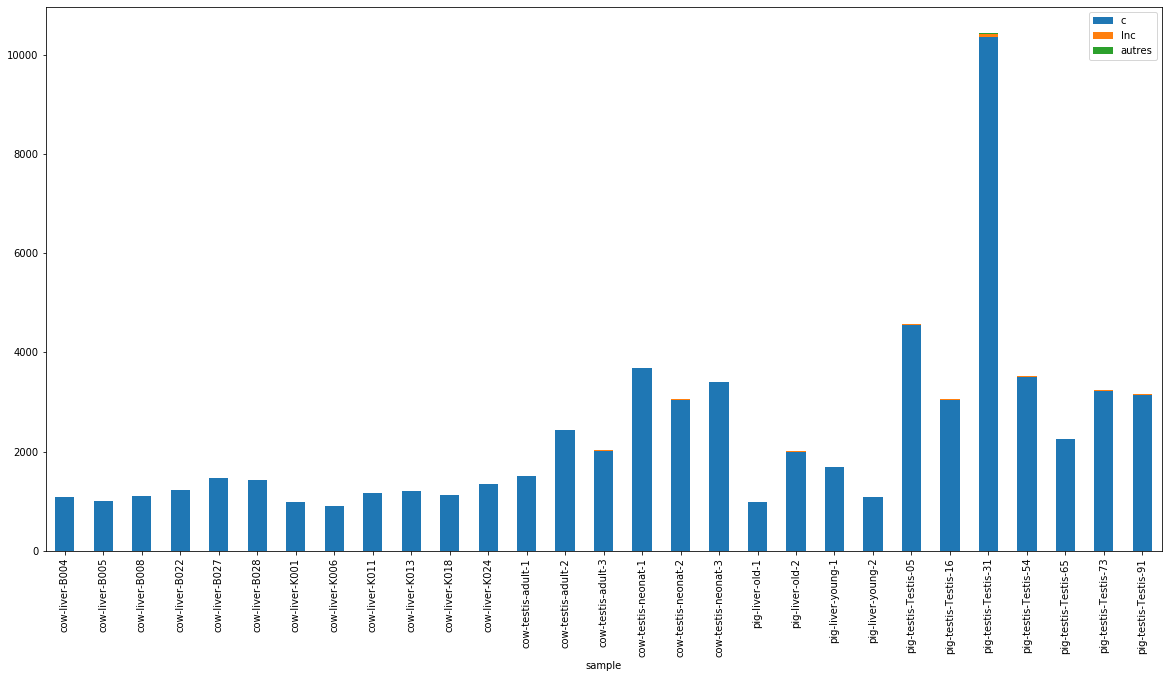

In [11]:
# Stacked bar plot:
columns_biotypes = ["sample", "c", "lnc", "autres"]
df_biotypes = pd.DataFrame(df_stats_annot, columns=columns_biotypes)
biotypes = df_biotypes.plot.bar(x='sample', stacked=True, figsize=(20,10))
figure_biotypes = biotypes.get_figure()    
figure_biotypes.savefig("figures/biotypes.png");

In [12]:
# generate related variables
#from numpy import mean
#from numpy import std
#from numpy.random import randn
#from numpy.random import seed
#from matplotlib import pyplot
# seed random number generator
#seed(1)
# prepare data
#data1 = 20 * randn(1000) + 100
#data2 = data1 + (10 * randn(1000) + 50)
# summarize
#print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
#print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
#pyplot.scatter(data1, data2)
#pyplot.show()